In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

### scikit-learn: machine learning in Python 
В библиотеке __sklearn__ реализованы многие из основных методов машинного обучения. Для них предусмотрены удобные унифированные интерфейсы (и их копируют другие библиотеки) и достаточно эффективные алгоритмы. Кроме того, sklearn предоставляет некоторые дополнительные средства, в частности, для предобработки данных и для выбора модели.

http://scikit-learn.org/

### Примеры датасетов

In [3]:
from sklearn.datasets import load_boston
boston = load_boston() # dataset — это не только матрица "объект-признак", но и некоторая дополнительная информация

In [4]:
" | ".join(boston.keys()) # основное, что может понадобиться в датасете

'data | feature_names | DESCR | target'

In [5]:
print(boston.data.shape) # размеры датасета (количество объектов, количество признаков)

(506, 13)


In [6]:
print(boston.feature_names) # названия признаков

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR) # а их описания можно найти, как ни странно, в описании датасета :)
# здесь же есть словесное описание задачи, её источник, количество признаков/атрибутов и прочая информация

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
target = pd.Series(boston.target) # вектор ответов для выборки data
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

### Обучение с учителем
Для каждого метода в sklearn реализован отдельный класс (например, [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), рассмотренный на предыдущем семинаре). 
При вызове его конструктора необходимо указать параметры метода или алгоритма обучения (но для них, как правило, есть значения по умолчанию). 

Для того, чтобы обучить модель по данным, нужно воспользоваться методом __fit(X_train, y_train)__, где X_train — матрица "объект-признак" обучающей выборки, y_train — вектор ответов для неё. Обязательное условие: X_train.shape[0] == y_train.shape[0] (в i-й строке y находится правильный ответ для i-го объекта в X). В результате в модели настроятся параметры, необходимые для предсказаний (например, для LinearRegression это веса $w_0, \dots, w_d$).

Чтобы сделать предсказание на новых данных, нужно воспользоваться методом __predict(X_test)__, X_test — матрица "объект-признак" для новых данных. Метод вернет вектор y_pred предсказанных алгоритмом ответов для объектов из X_test.

Кроме того, у каждого класса есть методы __get_params()__, который вернет словарь параметров (тех, которые указываются в конструкторе) и __set_params(**params)__, который может менять значения параметров.

Разберем описанное на примере LinearRegression, с которой мы уже имели дело.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

Допустим, мы хотели бы предсказывать стоимость квартир для уже загруженного выше датасета boston, при этом ещё и масштабировать признаки. Создадим линейный регрессор при помощи его конструктора, указав, что normalize = True (параметр, отвечающий за масштабирование признаков).

In [11]:
lr = LinearRegression(normalize=True)

Разделим датасет на обучающую и контрольную выборки.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42, test_size=0.2)

Теперь нам необходимо обучить наш регрессор lr на имеющихся данных. 

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Теперь предскажем ответы на контрольной выборке.

In [22]:
pred_values = lr.predict(X_test)

Посмотрим на MAE, MSE и коэффициент детерминации $R^2$ для предсказанных ответов pred_values и реально известных ответов y_test.

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(pred_values, y_test))
print("MSE:", mean_squared_error(pred_values, y_test))
print("R2: ", r2_score(pred_values, y_test))

('MAE:', 3.1915089722747996)
('MSE:', 24.311426929693354)
('R2: ', 0.63340561971933829)


Можно несколько раз разбить выборку на обучающую/тестовую, и итоговым качеством алгоритма считать среднее качество. Этот подход называется *K-fold*.

![](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

In [51]:
from sklearn.cross_validation import KFold
kfold = KFold(len(boston.target), n_folds=5, random_state=322, shuffle=False)
for tr_ind,test_ind in kfold:
    X_train, y_train = boston.data[tr_ind], boston.target[tr_ind]
    X_test, y_test = boston.data[test_ind], boston.target[test_ind]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred_values = lr.predict(X_test)
    print("MSE:", mean_squared_error(pred_values, y_test))

('MSE:', 12.480650212260194)
('MSE:', 26.096202669734851)
('MSE:', 33.119955872693517)
('MSE:', 80.833053778698854)
('MSE:', 33.584355652303721)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Если мы хотим получить значения параметров объекта, можно использовать метод get_params():

In [24]:
print(lr.get_params())

{'copy_X': True, 'normalize': True, 'n_jobs': 1, 'fit_intercept': True}


## Линейная классификация

Ранее мы изучили задачу восстановления регрессии и способы её решения. В частности, для линейной модели решение данной задачи выписывается аналитически через матрицу "объект-признак" и вектор ответов обучающей выборки.

Давайте приступим к рассмотрению задачи классификации. Начнём с того, что вспомним её постановку.

### Постановка задачи классификации

Пусть задана обучающая выборка $X^l = \left( x_i, y_i \right)_{i=1}^l, x_i \in \mathbb{X}, y_i \in \mathbb{Y},$ — $l$ пар объект-ответ, где
$\mathbb{X}$ — пространство объектов,
$\mathbb{Y}$ — пространство ответов.

Будем считать, что каждый объект описывается $d$ признаками: $x = \left( x^1, \dots, x^d \right)$.

Задача классификации отличается о задачи восстановления регрессии тем, что в данном случае пространство ответов конечно:
$$\left| \mathbb{Y} \right| < \infty.$$

Грубо говоря, каждому объекту мы ставим в соответствие название или номер группы, к которой он относится. При этом количество таких групп ограничено.

**Примеры**:

1) Кредитный скоринг.
* Объект — заявка на кредит от клиента банка.
* Ответ — 0 (не выдавать кредит клиенту) или 1 (выдать кредит клиенту).

2) Медицинская диагностика.
* Объект — характеристики пациента (результаты анализов, общая информация о пациенте, история болезни).
* Ответ — диагноз (одно из ограниченного множества заболеваний).

В дальнейшем будем рассматривать задачу бинарной классификации (то есть разделения объектов на 2 группы) и полагать $\mathbb{Y} = \{-1, +1\}.$

### Линейная модель

Сегодня мы будем рассматривать линейную модель. Для начала вспомним, как она выглядела в случае регрессии:
$$a_{regr}(x) = w_0 \cdot 1 + w_1 x^1 + \dots w_d x^d = \sum_{j = 0}^d w_j x^j = \langle w, x \rangle$$

Мы предполагаем, что нулевой признак в выборке — константный признак, поэтому не указываем отдельно свободный член $w_0$.

Как видоизменить эту формулу, чтобы она была пригодна и для решения задачи классификации?

Фиксируем некоторый вектор весов $w = \left(w_0, w_1, \dots, w_d \right)$ и рассмотрим множество точек $x = \left(x^0, x^1, \dots, x^d \right)$, для которых
$$\sum_{j = 0}^d w_j x^j = 0.$$

Если $d = 2$, то объекты — точки на плоскости, а указанное множество — прямая:
$$w_0 + w_1 x^1 + w_2 x^2 = 0$$

Если $d = 3$, то объекты — точки в трёхмерном пространстве, а указанное множество — плоскость:
$$w_0 + w_1 x^1 + w_2 x^2 + w_3 x^3 = 0$$

<tr>
<td> <img src="plane.png" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="cube.png" alt="Drawing" style="width: 350px;"/> </td>
</tr>

В общем случае данное множество называется **гиперплоскостью** и делит пространство на 2 части по разные стороны от этой самой гиперплоскости:
* $\langle w, x \rangle < 0$
* $\langle w, x \rangle > 0$

В связи с этим в качестве линейной модели классификации можно рассматривать следующую:
$$a(x) = sign (\langle w, x \rangle)$$

Можно показать, что для некоторого объекта $x$ расстояние до гиперплоскости для фиксированного вектора весов $w$ можно записать как $\frac{\left| \langle w, x \rangle \right|}{\|w \|}$.

Поэтому чем больше $\left| \langle w, x \rangle \right|$, тем дальше объект отстоит от гиперплоскости, тем увереннее алгоритм в его классификации.

### Оптимизируемый функционал

Теперь, когда мы выбрали модель, нам нужно понять, как из всех возможных векторов весов $w$ выбрать лучший. Что такое «лучший» вектор весов?

В случае линейной регрессии мы минимизировали среднюю абсолютную или среднеквадратичную ошибку. В случае классификации этот подход кажется немного странным, как минимум, потому что классы могут задаваться своими названиями, а не номерами. Их можно было бы занумеровать, но тогда результат будет сильно зависеть от способа нумерации, поэтому нужно придумать что-то другое.

Будем минимизировать долю неверных классификаций, которую можно записать в следующем виде:

$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^l [a(x_i) \ne y_i] \to \min_w,$$

где [statement] — нотация Айверсона (равно 1, если statement является истинным утверждением, и 0 в противном случае). Иначе говоря, слагаемое $[a(x_i) \ne y_i]$ показывает, верно ли алгоритм $a(\cdot)$ классифицировал объект $x_i$.

Рассмотрим слагаемое для объекта $x_i$ и отметим, что $[a(x_i) \ne y_i] = [a(x_i) \cdot y_i < 0]$. Действительно:
* пусть $a(x_i) = -1, y_i = -1$ (классификация верная и $[a(x_i) \ne y_i] = 0$), тогда $a(x_i) \cdot y_i = 1 > 0$;
* пусть $a(x_i) = -1, y_i = +1$ (классификация неверная и $[a(x_i) \ne y_i] = 1$), тогда $a(x_i) \cdot y_i = -1 < 0$;
* пусть $a(x_i) = +1, y_i = -1$ (классификация неверная и $[a(x_i) \ne y_i] = 1$), тогда $a(x_i) \cdot y_i = -1 < 0$;
* пусть $a(x_i) = +1, y_i = +1$ (классификация верная и $[a(x_i) \ne y_i] = 0$), тогда $a(x_i) \cdot y_i = 1 > 0$.

Поэтому функционал можно переписать в следующем виде:
$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^l [a(x_i) \cdot y_i < 0] = \frac{1}{l} \sum_{i = 1}^l [y_i \cdot \langle w, x_i \rangle  < 0] \to \min_w.$$

Величина $M_i = y_i \cdot \langle w, x_i \rangle$ называется **отступом** объекта $x_i$. Как было показано ранее:
* объект верно классифицируется тогда и только тогда, когда отступ положительный;
* чем больше значение отступа, тем надёжнее классифицируется объект.

Хорошо, давайте найдём антиградиент нашего функционала, запустим градиентный спуск и тем самым найдём оптимальное значение $w$?

Проблема в том, что функционал разрывный, поэтому возникают проблемы с производными, антиградиентом и, соответственно, привычными нам методами оптимизации.

Давайте оценим наш функционал сверху некоторой гладкой функцией и будем минимизировать её:

$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^l [M_i < 0] \le \frac{1}{l} \sum_{i = 1}^l \widetilde{L}(M_i) = \widetilde{Q}(w, X) \to \min_{w}$$

Примеры оценок сверху для одного объекта:
<img src="est.png" alt="Drawing" style="width: 650px;">

**ВАЖНО**: мы минимизируем верхнюю оценку и надеемся, что тогда будет минимизироваться и исходный функционал $Q(w, X)$, однако нет никаких гарантий, что так и будет!

В зависимости от выбранной верхней оценки будут меняться свойства итогового алгоритма, положение разделяющей гиперплоскости и т.п.

### Итог

Таким образом, у нас имеется всё, что необходимо, для построения линейного классификатора.

* Получение обучающей выборки $X^l = \left( x_i, y_i \right)_{i=1}^l$
* Выбор верхней оценки для пороговой функции потерь — отсюда получаем общий вид оптимизируемого функционала $\widetilde{Q}(w, X^l)$
* Проводим оптимизацию при помощи градиентного спуска и получаем оптимальное значение $w^*$
* Предсказываем ответы для новых объектов по формуле $a(x) = \langle w^*, x\rangle$

### Логистическая регрессия

Рассмотрим в качестве верхней оценки пороговой функции потерь логистическую функцию:

$$\widetilde{L}(M) = \log_2(1 + \exp(-M)).$$

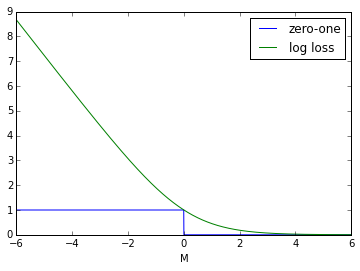

In [18]:
x_arr = np.linspace(-6, 6, 2001)
zero_one = (x_arr < 0)
log_loss = np.log2(1 + np.exp(-x_arr))
plt.plot(x_arr, zero_one)
plt.plot(x_arr, log_loss)
plt.xlabel('M')
plt.legend(['zero-one', 'log loss'], loc='upper right')

Таким образом, необходимо решить следующую оптимизационную задачу:
$$\frac{1}{l} \sum_{i=1}^l \widetilde{L} (M_i) = \frac{1}{l} \sum_{i=1}^l \log_2 (1 + \exp (-y_i \langle w, x_i \rangle)) \to \min_w$$

Получившийся метод обучения называется **логистической регрессией**.

Давайте получим его, подойдя немного с другой стороны. Допустим, мы решаем задачу бинарной классификации, но хотим получать не только одну из двух меток, но и вероятность принадлежности объекта классу. 

**Пример**: Вы работаете в банке и хотите выдавать кредиты только тем клиентам, которые вернут его с вероятностью не меньше 0.9.

Отметим, что
$$P(y = -1|x) = 1 - P(y = +1|x),$$

поэтому будем работать с вероятностью принадлежности объекта $x$ классу +1, т.е. $P(y = +1|x).$

Мы могли бы считать $\langle w, x \rangle$ вероятностью принадлежности объекта $x$ классу +1, однако, как мы знаем, вероятность обязана лежать в отрезке [0; 1] (что неверно для скалярного произведения). Давайте обернем скалярное произведение в какую-нибудь функцию, которая будет принимать значения в отрезке [0; 1]! Например, **сигмоидную функцию**:

$$\sigma(z) = \frac{1}{1 + \exp(-z)}$$

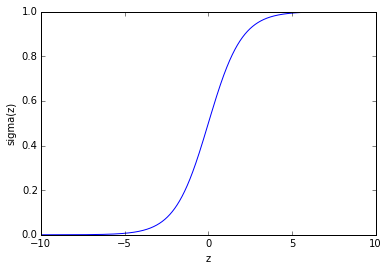

In [98]:
x_arr = np.linspace(-10, 10, 2001)
sigmoid = 1 / (1 + np.exp(-x_arr))
plt.plot(x_arr, sigmoid)
plt.xlabel('z')
plt.ylabel('sigma(z)')

Будем считать, что

$$P(y = +1|x) = \sigma(\langle w, x \rangle) = \frac{1}{1 + exp(- \langle w, x \rangle)}$$

На лекции было показано, что при такой постановке логично решать следующую оптимизационную задачу:


$$\frac{1}{l} \sum_{i=1}^l \{ [y_i = +1] \log_2 \sigma(\langle w, x_i \rangle) + [y_i = -1] \log_2 (1 - \sigma(\langle w, x_i \rangle)) \} \to \max_{w}$$

На самом деле, оказывается, что эта задача аналогична уже рассмотренной с использованием логистической функции в качестве аппроксимации. При этом функционал гладкий, и его можно оптимизировать при помощи градиентного спуска!

### Практика

Давайте сгенерируем выборку с 2 классами на плоскости:

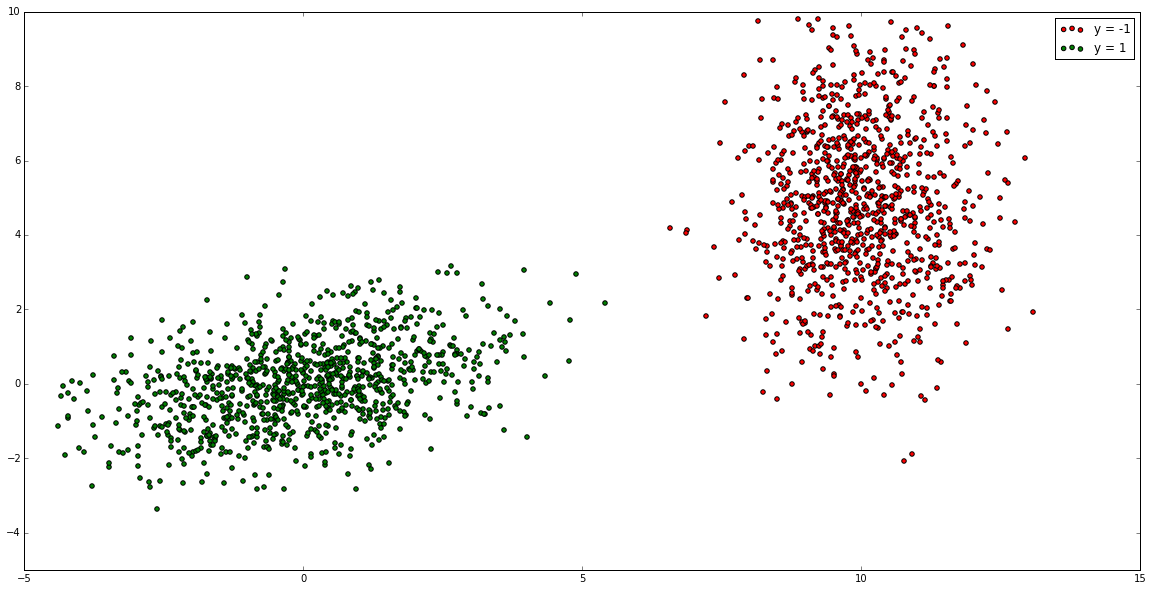

In [19]:
plt.figure(figsize=(20,10))
mean0 = [10, 5]
cov0 = [[1, 0], [0, 5]]  # diagonal covariance
data0 = np.random.multivariate_normal(mean0, cov0, 1000)
mean1 = [0, 0]
cov1 = [[3, 1], [0, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 1000)
data = np.vstack((data0, data1))
y = np.hstack((-np.ones(1000), np.ones(1000)))


plt.scatter(data0[:, 0], data0[:, 1], c='red')
plt.scatter(data1[:, 0], data1[:, 1], c='green')
plt.legend(['y = -1', 'y = 1'])
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.show()

Разделим выборку на обучающую и контрольную в отношении 70/30:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)

Создадим объект LogisticRegression и обучим классификатор:

In [21]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(penalty = 'l2')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

Полученные значения весов $w_1, ..., w_d$ можно найти в logreg.coef\_, а $w_0$ — в logreg.intercept\_.

In [22]:
print(logreg.coef_, logreg.intercept_)

[[-1.07672551 -0.32400297]] [ 5.99733467]


Давайте в одних осях нарисуем объекты и разделяющую гиперплоскость, которая получилась в результате обучения классификатора. Напомним, что она имеет следующее уравнение:

$$\langle w, x \rangle = \sum_{j=0}^2 w_j x_j = w_0 + w_1 x_1 + w_2 x_2 = 0$$

In [23]:
w_1 = logreg.coef_[0][0]
w_2 = logreg.coef_[0][1]
w_0 = logreg.intercept_[0]


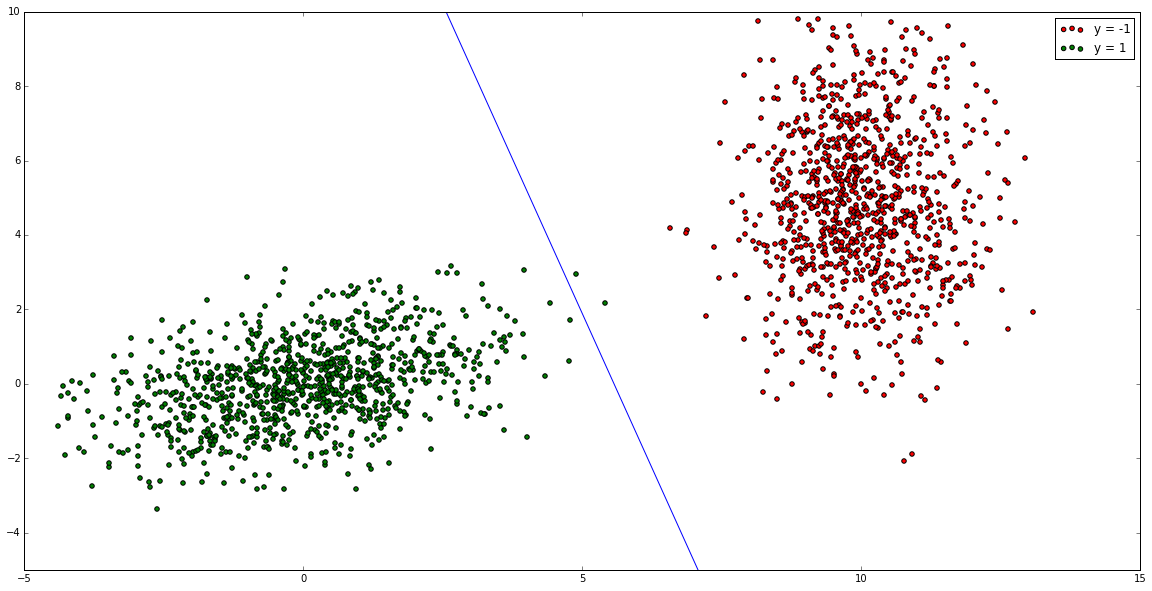

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red')
plt.scatter(data1[:, 0], data1[:, 1], c='green')
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-10, 15, 3000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.show()

Давайте посмотрим на вероятность отнесения объекта к каждому из классов в зависимости от его положения в пространстве.

P(y = -1|x) = 0.00472887085799
P(y = 1|x) = 0.995271129142


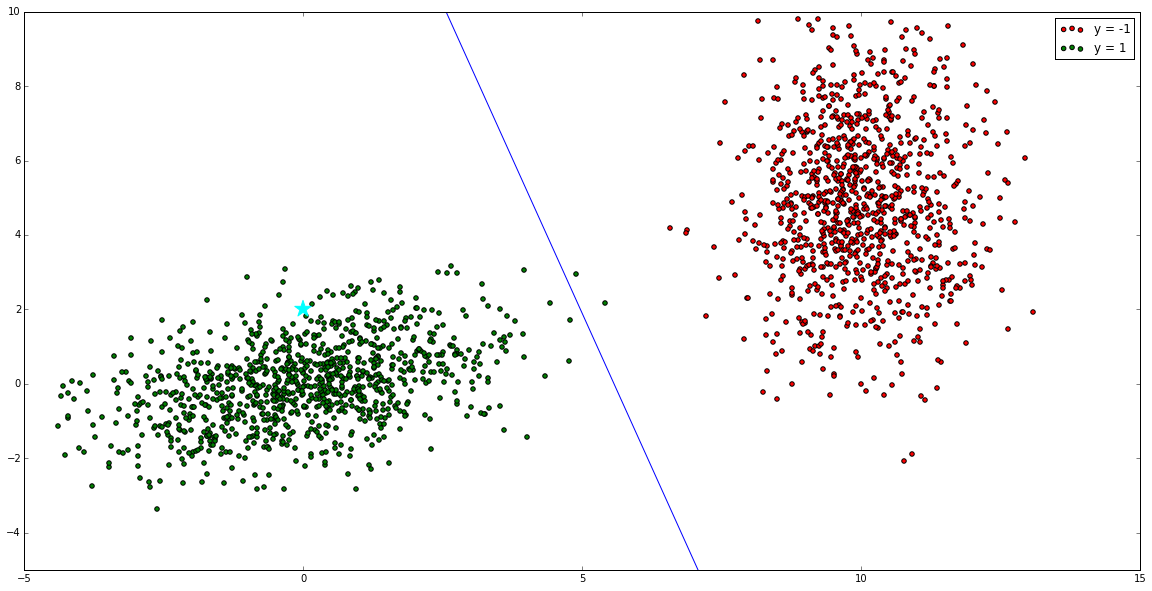

In [31]:
point = np.array([[0, 2]]) # изменяем только координаты объекта

plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red')
plt.scatter(data1[:, 0], data1[:, 1], c='green')
plt.scatter(point[:, 0], point[:, 1], marker = '*', s = 300, color = 'cyan')
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-10, 15, 3000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
prob = logreg.predict_proba(point)
print('P(y = -1|x) =', prob[0][0])
print('P(y = 1|x) =', prob[0][1])
plt.show()